In [46]:
import csv
import numpy as np
import pandas as pd

data = pd.read_excel(r'C:\Users\akabo\Downloads\HW3.xlsx')
data.head()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,127.87
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0.00
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127.48
3,4,1,0,1,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0.00
4,5,1,0,1,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0.00


In [49]:
data.iloc[:,22]

0       1
1       0
2       0
3       0
4       0
5       1
6       1
7       0
8       0
9       0
10      0
11      1
12      0
13      0
14      1
15      0
16      1
17      0
18      1
19      0
20      0
21      0
22      1
23      1
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1970    0
1971    1
1972    0
1973    0
1974    0
1975    0
1976    1
1977    0
1978    0
1979    1
1980    0
1981    0
1982    0
1983    0
1984    1
1985    0
1986    1
1987    0
1988    0
1989    0
1990    1
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    1
1999    0
Name: Address_is_res, Length: 2000, dtype: int64

Text(0.5,1,'Histogram of Log of Price')

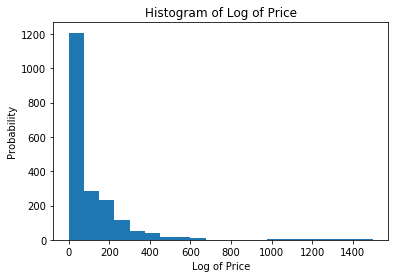

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(y, bins = 20)
plt.xlabel('Log of Price')
plt.ylabel('Probability')
plt.title('Histogram of Log of Price')

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['Freq', 'last_update_days_ago', '1st_update_days_ago', 'Spending']
sns.pairplot(data[cols], size=2.5) # Plot pairwise relationships in a dataset
plt.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area.
# plt.savefig('housing_dataset.png', dpi=300)
plt.show() # display figure

cm = np.corrcoef(data[cols].values.T) # Return Pearson product-moment correlation coefficients
# sns.set(font_scale=1.5)
# Heatmap visualisation of pearson correlation coefficients
# Documentation https://seaborn.pydata.org/generated/seaborn.heatmap.html
hm = sns.heatmap(cm,                # Plot rectangular data as a color-encoded matrix
                 cbar=True,         # Whether to draw a colorbar.
                 annot=True,        # If True, write the data value in each cell.
                 square=True,       # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 fmt='.2f',         # String formatting code to use when adding annotations.
                 annot_kws={'size': 15}, # Keyword arguments for ax.text when annot is True
                 yticklabels=cols,  # If True, plot the column names of the dataframe.
                 xticklabels=cols)

# plt.savefig('correlation_coefficient.png', dpi=300)
plt.show()

<Figure size 1000x1000 with 20 Axes>

<Figure size 640x480 with 2 Axes>

In [20]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,1:23]
y = data['Spending']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, random_state=42)

In [33]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
clf = Ridge()
clf2 =Lasso()
y_pred = clf.fit(X_train, y_train).predict(X_test)
y_pred2=clf2.fit(X_train, y_train).predict(X_test)
rmse_ridge_test = np.sqrt(mean_squared_error(y_test, y_pred))
mae_ridge_train = mean_absolute_error(y_test, y_pred)
rmse_lasso_test = np.sqrt(mean_squared_error(y_test, y_pred2))
mae_lasso_train = mean_absolute_error(y_test, y_pred2)
print(mae_ridge_train)
print(rmse_ridge_test)
print(mae_lasso_train)
print(rmse_lasso_test)

73.3567142734951
127.83377150845156
73.68770053168087
127.99714767504028


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

C:\Users\akabo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akabo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\akabo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [ ]:
# GridSearchCV: a) linear regression b)k-NN c)regression tree
from sklearn import neighbors, datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso # Lasso Regression class
from sklearn.linear_model import Ridge # Ridge Regression class
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
gs_ridge = GridSearchCV(estimator=Ridge(random_state = 42),
                      param_grid=[{'alpha': [ 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 
                                             100, 1000, 10000, 100000, 1000000, 10000000]}],
                      scoring='neg_mean_squared_error',
                      cv=10, n_jobs=4)

gs_ridge = gs_ridge.fit(X_train,y_train)

print(gs_ridge.best_estimator_)
print('Best MSE: %.2f\n'% abs(gs_ridge.best_score_))


In [7]:
np.random.seed(42)

# a1) Lasso regression
gs_lasso = GridSearchCV(estimator=Lasso(random_state = 42),
                      param_grid=[{'alpha': [ 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 
                                             100, 1000, 10000, 100000, 1000000, 10000000]}],
                      scoring='neg_mean_squared_error',
                      cv=10, n_jobs=4)

gs_lasso = gs_lasso.fit(X_train,y_train)

print(gs_lasso.best_estimator_)
print('Best MSE: %.2f \n'% abs(gs_lasso.best_score_))
Lasso=Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)
Lasso.fit(X_train,y_train)
print(Lasso.coef_)
# a2) Ridge regression
gs_ridge = GridSearchCV(estimator=Ridge(random_state = 42),
                      param_grid=[{'alpha': [ 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 
                                             100, 1000, 10000, 100000, 1000000, 10000000]}],
                      scoring='neg_mean_squared_error',
                      cv=10, n_jobs=4)

gs_ridge = gs_ridge.fit(X_train,y_train)

print(gs_ridge.best_estimator_)
print('Best MSE: %.2f\n'% abs(gs_ridge.best_score_))

# b) kNN regression
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

gs_knn = GridSearchCV(estimator=neighbors.KNeighborsRegressor(p=2, metric='minkowski',
                                                             weights='distance'),
                      param_grid = [{'n_neighbors': range(1, 30, 1)}],
                      scoring='neg_mean_squared_error',
                      cv=10, n_jobs=4)
gs_knn = gs_knn.fit(X_train_std, y_train)
print(gs_knn.best_estimator_)
print('Best MSE: %.2f\n'% abs(gs_knn.best_score_))

# c) regression tree
gs_tree = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                       param_grid = [{'max_depth': range(3,12,1),
                                     'min_samples_leaf':[50,100,200],
                                     'max_leaf_nodes': range(8,26,2)}],
                       scoring='neg_mean_squared_error',
                       cv=10, n_jobs=4)
gs_tree = gs_tree.fit(X_train, y_train)
print(gs_tree.best_estimator_)
print('Best MSE: %.2f\n'% abs(gs_tree.best_score_))

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)
Best MSE: 16349.28 

[-1.15537913e+00  4.19728502e+01 -3.69566759e+01 -2.11137291e+00
 -1.72358265e+01 -7.87402586e-01 -8.99829649e+00  1.21886477e+01
 -9.04305390e+01  3.85404972e+01 -4.73356556e+00  3.82222838e+00
  3.88378712e+01 -1.13415656e+00  0.00000000e+00  2.09315847e+01
  8.74602323e+01 -1.59199596e-02  7.83782680e-03  1.29817901e+01
 -1.17232651e+00 -6.60785327e+01]
Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='auto', tol=0.001)
Best MSE: 16345.25

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='distance')
Best MSE: 21083.08

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
           max_leaf_nodes=16, 

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

# a1) Lasso regression
lasso = gs_lasso.fit(X_train, y_train)

y_pred_lasso_train = lasso.predict(X_train)
y_pred_lasso_test = lasso.predict(X_test)

rmse_l_train = np.sqrt(mean_squared_error(y_train, y_pred_lasso_train))
rmse_l_test = np.sqrt(mean_squared_error(y_test, y_pred_lasso_test))

mae_l_train=mean_absolute_error(y_train, y_pred_lasso_train) 
mae_l_test=mean_absolute_error(y_train, y_pred_lasso_train) 

evs_l_train=explained_variance_score(y_train, y_pred_lasso_train)
evs_l_test=explained_variance_score(y_train, y_pred_lasso_train)

rmse_l_test






127.75030294001854

In [39]:
# a2) Ridge regression
ridge = gs_ridge.fit(X_train, y_train)

y_pred_ridge_train = ridge.predict(X_train)
y_pred_ridge_test = ridge.predict(X_test)

rmse_2_train = np.sqrt(mean_squared_error(y_train, y_pred_ridge_train))
rmse_2_test = np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))

mae_2_train=mean_absolute_error(y_train, y_pred_ridge_train) 
mae_2_test=mean_absolute_error(y_train, y_pred_ridge_train) 

evs_2_train=explained_variance_score(y_train, y_pred_ridge_train)
evs_2_test=explained_variance_score(y_train, y_pred_ridge_train)

rmse_2_test

127.89242722325126

In [40]:
# b) kNN regression
knn = gs_knn.fit(X_train, y_train)

y_pred_knn_train = knn.predict(X_train)
y_pred_knn_test = knn.predict(X_test)

rmse_3_train = np.sqrt(mean_squared_error(y_train, y_pred_knn_train))
rmse_3_test = np.sqrt(mean_squared_error(y_test, y_pred_knn_test))

mae_3_train=mean_absolute_error(y_train, y_pred_knn_train) 
mae_3_test=mean_absolute_error(y_train, y_pred_knn_train) 

evs_3_train=explained_variance_score(y_train, y_pred_knn_train)
evs_3_test=explained_variance_score(y_train, y_pred_knn_train)

rmse_3_test


163.11972735121552

In [42]:
# c) regression tree
tree = gs_tree.fit(X_train, y_train)

y_pred_tree_train = tree.predict(X_train)
y_pred_tree_test = tree.predict(X_test)

rmse_4_train = np.sqrt(mean_squared_error(y_train, y_pred_tree_train))
rmse_4_test = np.sqrt(mean_squared_error(y_test, y_pred_tree_test))

mae_4_train=mean_absolute_error(y_train, y_pred_tree_train) 
mae_4_test=mean_absolute_error(y_train, y_pred_tree_train) 

evs_4_train=explained_variance_score(y_train, y_pred_tree_train)
evs_4_test=explained_variance_score(y_train, y_pred_tree_train)

rmse_4_test

133.3141608701681